### Options Pricing Models

#### 1) Black-Scholes Model for European Options

In [1]:
# Import Libraries

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
# Defining a Black-Scholes model

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    S: Current Stock Price
    K: Strike Price
    T: Time to maturity (in years)
    r: Risk-free interest rate
    sigma: Volatility of the underlying asset
    option_type: 'call' or 'put'
    """
    # d1 represents the 'moneyness' of the option and is adjusted for time and 
    # volatility. It measures how far the underlying price is from the 
    # strike price in terms of standard deviations
    d1 = (np.log(S/K) + (r + 0.5 * sigma **2) * T) / (sigma * np.sqrt(T))

    # d2 adjusts d1 by subtracting volatility over time, representing the  
    # probability-adjusted strike price
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Option must be either a 'call' or 'put' type")
    return price

In [4]:
# Test the Model
S = 100  # Current stock price
K = 110  # Strike price
T = 0.5    # Time to maturity in years
r = 0.05 # Risk-free rate
sigma = 0.2  # Volatility

# Call and Put Prices
call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print(f"European Call Option Price: {call_price:.2f}")
print(f"European Put Option Price: {put_price:.2f}")

European Call Option Price: 2.91
European Put Option Price: 10.19


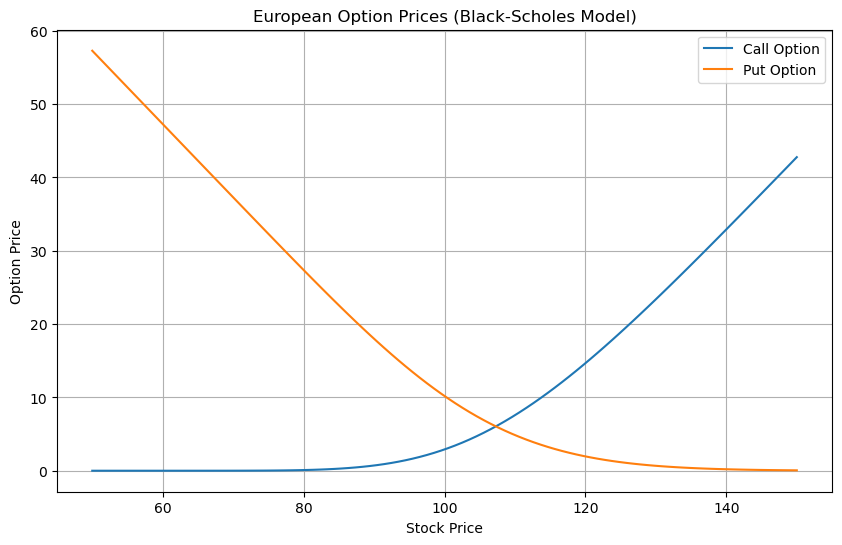

In [5]:
# Visualising the option prices for a range of stock prices
stock_prices = np.linspace(50, 150, 100)

call_prices = [black_scholes(S, K, T, r, sigma, 'call') for S in stock_prices]
put_prices = [black_scholes(S, K, T, r, sigma, 'put') for S in stock_prices]

plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_prices, label='Call Option')
plt.plot(stock_prices, put_prices, label='Put Option')
plt.title('European Option Prices (Black-Scholes Model)')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()